In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [375]:
# assign columns to the dataset according to the attribute
columns = [
    'age', 'workclass', 'final-weight', 'education', 'education-years',
    'marital-status', 'occupations', 'relationships', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'incomes'
]

# import the data files
data_train = pd.read_csv('/content/drive/MyDrive/Datasets/adult.data',
                         header=None, names=columns, na_values=' ?')
data_test = pd.read_csv('/content/drive/MyDrive/Datasets/adult.test',
                        header=None, names=columns,skiprows=1, na_values=' ?')

In [328]:
# join the two dataset together
new_data = pd.concat([data_train,data_test],axis=0)
new_data.head()

,age,workclass,final-weight,education,education-years,marital-status,occupations,relationships,race,sex,capital-gain,capital-loss,hours-per-week,native-country,incomes
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [329]:
# check the information of the new data
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   final-weight     48842 non-null  int64 
 3   education        48842 non-null  object
 4   education-years  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupations      46033 non-null  object
 7   relationships    48842 non-null  object
 8   race             48842 non-null  object
 9   sex              48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  incomes          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


## DATA CLEANING


In [330]:
# check for null values
new_data.isnull().sum()

,0
age,0
workclass,2799
final-weight,0
education,0
education-years,0
marital-status,0
occupations,2809
relationships,0
race,0
sex,0


In [331]:
# drop the null values present
new_data = new_data.dropna(how='any')

In [332]:
# check for duplicates
new_data.duplicated().sum()

np.int64(28)

In [333]:
# drop the duplicates
new_data.drop_duplicates(inplace=True)

<ipython-input-333-172773296d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop_duplicates(inplace=True)


In [334]:
# check the summary statistics
new_data.describe()

,age,final-weight,education-years,capital-gain,capital-loss,hours-per-week
count,45194.000000,4.519400e+04,45194.000000,45194.000000,45194.000000,45194.000000
mean,38.551755,1.897379e+05,10.119109,1102.112736,88.650308,40.941209
std,13.215806,1.056407e+05,2.552057,7508.705003,405.075515,12.006449
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173922e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [335]:
# show the frequency of unique values in the income column
new_data['incomes'].value_counts()

,count
incomes,
<=50K,22633
<=50K.,11355
>50K,7506
>50K.,3700


In [336]:
# show the frequency of unique values in the age column
new_data['age'].value_counts()

,count
age,
36,1283
33,1279
31,1274
35,1271
23,1240
...,...
88,5
85,5
86,1


In [337]:
# clean the target variable
new_data['incomes'] = new_data['incomes'].str.strip().str.lower()
new_data['incomes'].value_counts()

,count
incomes,
<=50k,22633
<=50k.,11355
>50k,7506
>50k.,3700


In [338]:
# replace the income(target) values with 1 and 0
new_data['incomes'] = new_data['incomes'].replace({'<=50k': 0, '>50k': 1})

In [339]:
# convert the income(target) column to numeric and drop the NAN values
new_data['incomes'] = pd.to_numeric(new_data['incomes'], errors='coerce')
new_data.dropna(subset=['incomes'],inplace=True)
new_data['incomes'].value_counts()

,count
incomes,
0.0,22633
1.0,7506


In [374]:
# change the float to integers
new_data['incomes'] = new_data['incomes'].astype(int)
print(new_data['incomes'].dtypes)
print(new_data['incomes'].value_counts()) # note there is an imbalance in income data

int64
incomes
0    22633
1     7506
Name: count, dtype: int64


In [341]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30139 non-null  int64 
 1   workclass        30139 non-null  object
 2   final-weight     30139 non-null  int64 
 3   education        30139 non-null  object
 4   education-years  30139 non-null  int64 
 5   marital-status   30139 non-null  object
 6   occupations      30139 non-null  object
 7   relationships    30139 non-null  object
 8   race             30139 non-null  object
 9   sex              30139 non-null  object
 10  capital-gain     30139 non-null  int64 
 11  capital-loss     30139 non-null  int64 
 12  hours-per-week   30139 non-null  int64 
 13  native-country   30139 non-null  object
 14  incomes          30139 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


## DATA VISUALIZATION


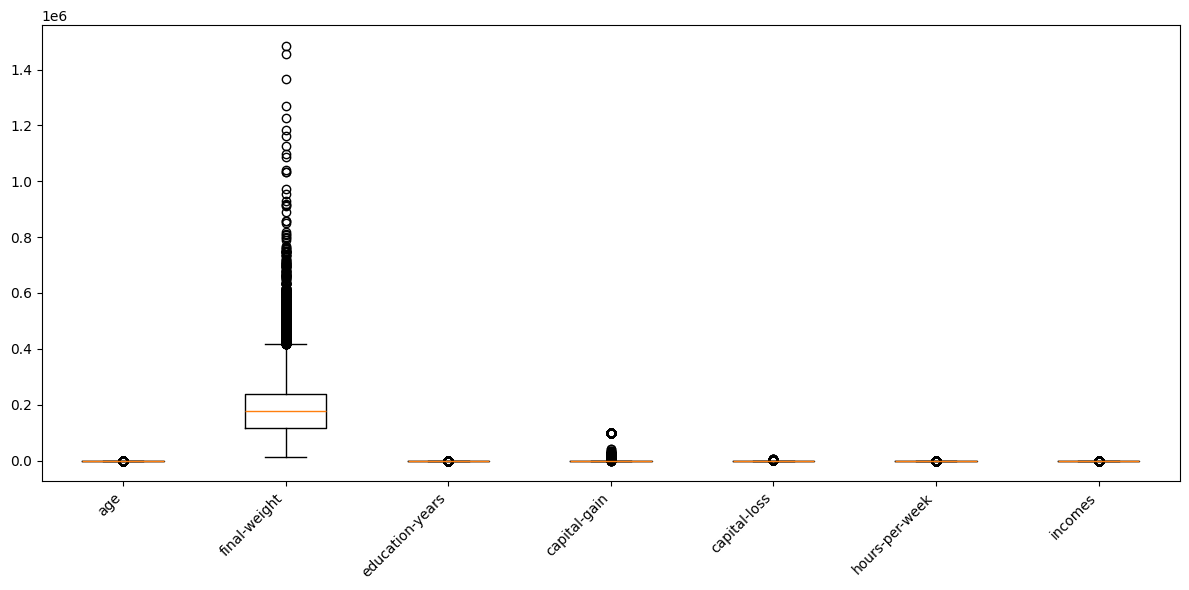

In [342]:
# Select only int64 columns for box plots
columns_select = new_data.select_dtypes(include=['int64']).columns

# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot box plots for all int64 columns together
ax.boxplot(new_data[columns_select].values, tick_labels=columns_select)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

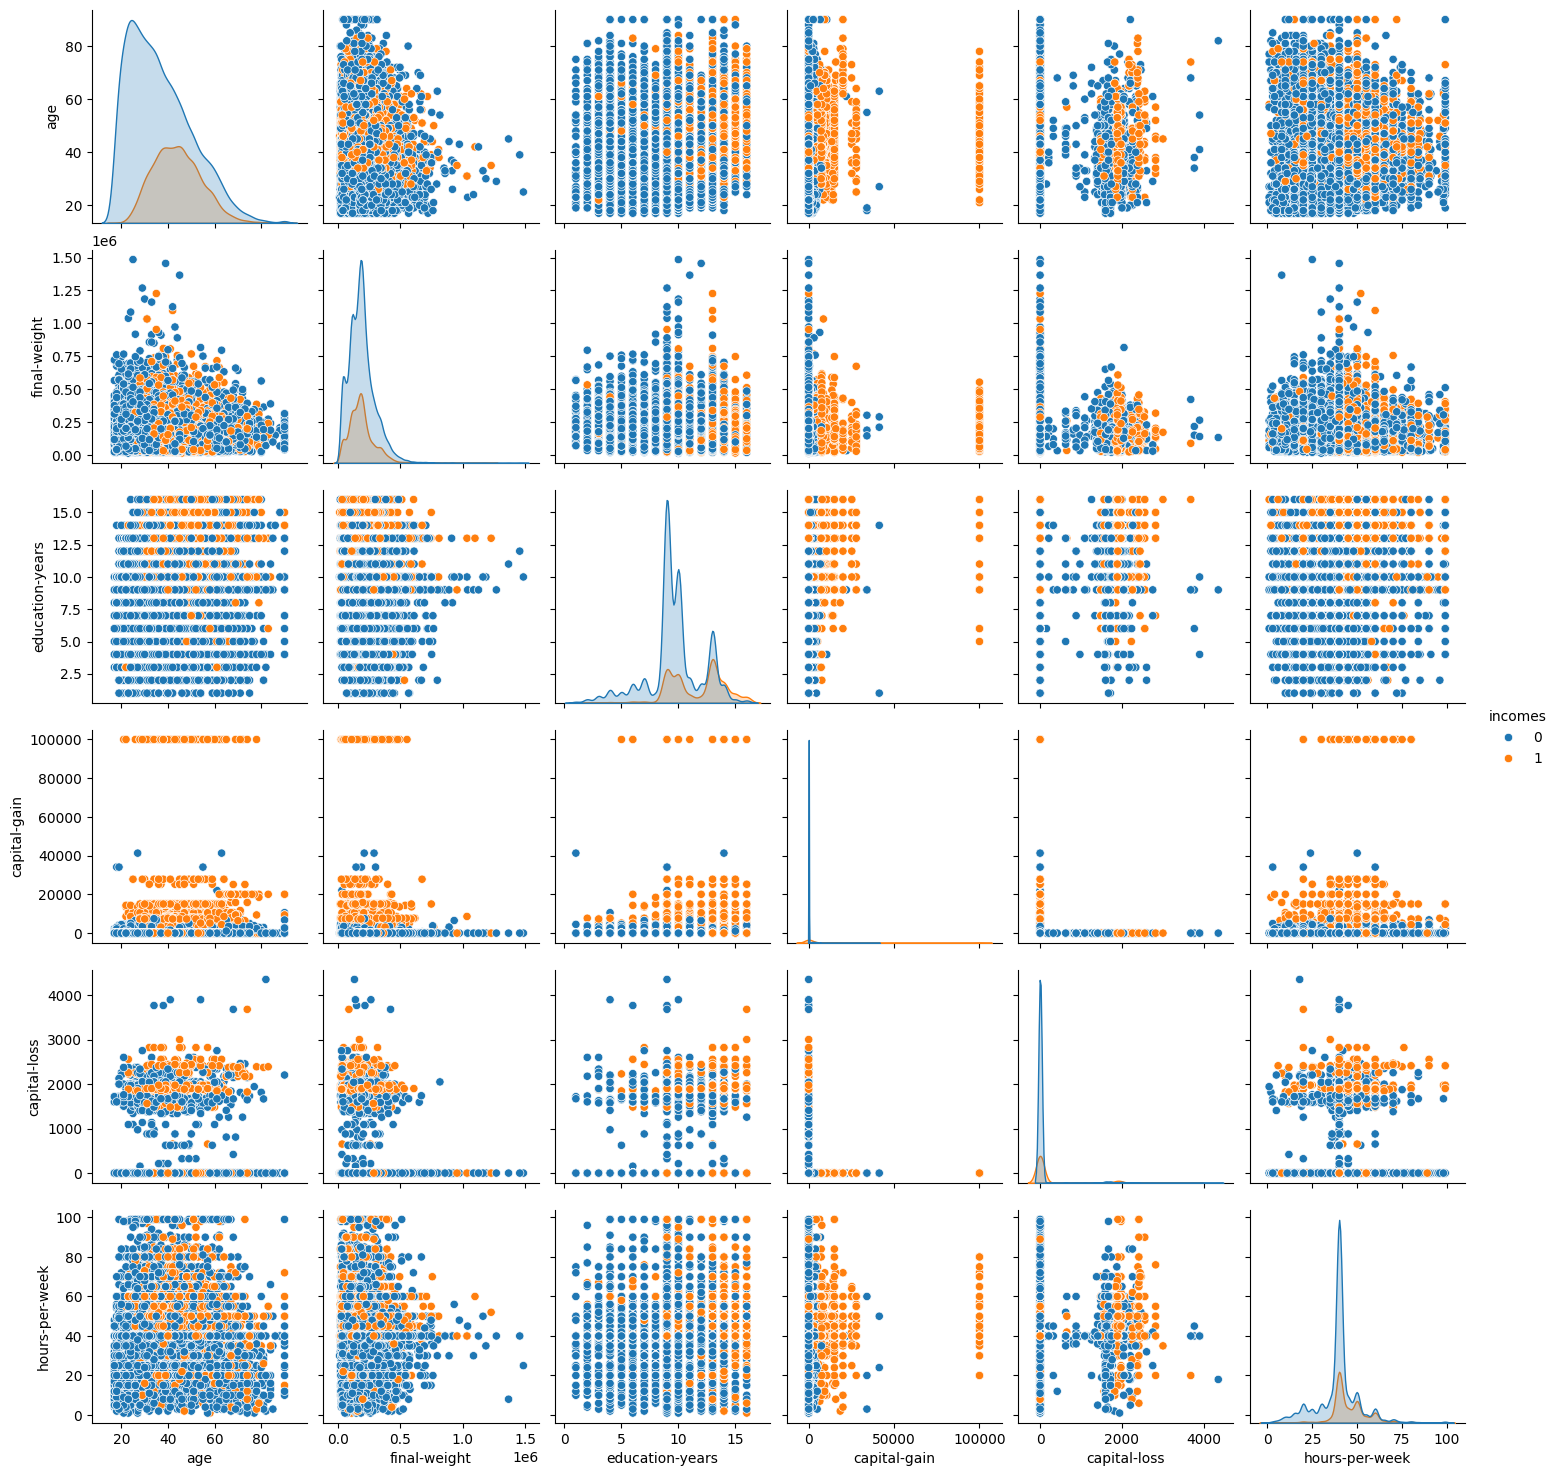

In [343]:
# Create a pairplot to show the relationships between pairs of variables
pairplot = sns.pairplot(new_data,hue='incomes')

<Axes: xlabel='incomes', ylabel='count'>

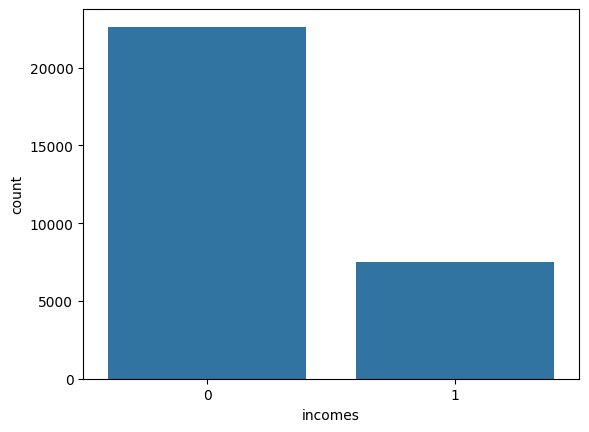

In [344]:
sns.countplot(data=new_data,x='incomes')

# More summary analysis for the new data


In [346]:
new_data.groupby(['workclass','sex'])['incomes'].mean()

workclass         sex   
Federal-gov       Female    0.177994
                  Male      0.488959
Local-gov         Female    0.184466
                  Male      0.367659
Private           Female    0.094458
                  Male      0.283849
Self-emp-inc      Female    0.301587
                  Male      0.592827
Self-emp-not-inc  Female    0.204082
                  Male      0.301045
State-gov         Female    0.136364
                  Male      0.349686
Without-pay       Female    0.000000
                  Male      0.000000
Name: incomes, dtype: float64

In [347]:
new_data.describe()

,age,final-weight,education-years,capital-gain,capital-loss,hours-per-week,incomes
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703,0.249046
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753,0.432468
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


## SUPPORT VECTOR MACHINE TRAINING AND EVALUATION


In [348]:
# Assign the dataset to X and y
X = new_data.drop('incomes', axis=1)
y = new_data['incomes']

In [349]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [350]:
# split into categorical and numerical variable in X
categorical_column = X.select_dtypes(include=['object']).columns
numerical_column = X.select_dtypes(include=['int64', 'float64']).columns

In [351]:
# Assign the OneHotEncoder to the X train and X test categories
encoded = OneHotEncoder(handle_unknown='ignore',sparse_output=False)
X_train_categories = encoded.fit_transform(X_train[categorical_column])
X_test_categories = encoded.transform(X_test[categorical_column])

In [352]:
# Assign Standardization to the X train and X test numerics
scaled_code = StandardScaler()
X_train_numerical = scaled_code.fit_transform(X_train[numerical_column])
X_test_numerical = scaled_code.transform(X_test[numerical_column])

In [353]:
# Combine the X test and X trained of both variables together
X_train_new = np.concatenate((X_train_categories, X_train_numerical), axis=1)
X_test_new = np.concatenate((X_test_categories, X_test_numerical), axis=1)

In [373]:
# Implement SMOTE to balance the data
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train_os, y_train_os = os.fit_resample(X_train_new, y_train)


In [355]:
# Apply PCA to the X train and X test for noise reduction
#pca = PCA(n_components=2)
#X_train_pca = pca.fit_transform(X_train_os)
#X_test_pca = pca.transform(X_test_new)

In [356]:
# Apply the SVM model
svc_model = SVC(kernel='rbf', C=5, probability=True)
svc_model.fit(X_train_os, y_train_os)

SVC(C=5, probability=True)

In [357]:
y_pred = svc_model.predict(X_test_new)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [358]:
# check for the score accuracy of the model
accuracy_score(y_test, y_pred)

0.8246516257465163

In [359]:
# print the classification of the SVM model
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      4485
           1       0.62      0.84      0.71      1543

    accuracy                           0.82      6028
   macro avg       0.78      0.83      0.79      6028
weighted avg       0.85      0.82      0.83      6028



In [360]:
# evaluation of the SVM model using confusion maxtrix
print(confusion_matrix(y_test,y_pred))

[[3680  805]
 [ 252 1291]]


## DECISION TREE MODEL

 Decision trees can be applied to both regression and classification problems.
  Decision trees is implemented to compare the scores with the SVM model


In [361]:
# apply the decision tree model to the selected data
decision_model = DecisionTreeClassifier()
decision_model.fit(X_train_os, y_train_os)

DecisionTreeClassifier()

In [362]:
y_pred_decision = decision_model.predict(X_test_new)
y_pred_decision

array([0, 1, 0, ..., 0, 1, 0])

In [363]:
# check for the score accuracy of the decision tree model
accuracy_score(y_test, y_pred_decision)

0.8070670205706703

In [364]:
# print the classification of the decision tree model
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4485
           1       0.62      0.65      0.63      1543

    accuracy                           0.81      6028
   macro avg       0.75      0.75      0.75      6028
weighted avg       0.81      0.81      0.81      6028



In [365]:
# evaluation of the SVM model using confusion maxtrix
print(confusion_matrix(y_test,y_pred_decision))

[[3869  616]
 [ 547  996]]


## RANDOM FOREST


In [366]:
# apply the Random forest classifier model to the selected data
random_forest_model = RandomForestClassifier(n_estimators=200)
random_forest_model.fit(X_train_os, y_train_os)

RandomForestClassifier(n_estimators=200)

In [367]:
y_pred_random = random_forest_model.predict(X_test_new)

In [368]:
# check for the score accuracy of the random forest model
accuracy_score(y_test, y_pred_random)

0.8513603185136032

In [369]:
print(classification_report(y_test,y_pred_random))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      4485
           1       0.71      0.71      0.71      1543

    accuracy                           0.85      6028
   macro avg       0.80      0.81      0.81      6028
weighted avg       0.85      0.85      0.85      6028



In [370]:
print(confusion_matrix(y_test,y_pred_random))

[[4033  452]
 [ 444 1099]]


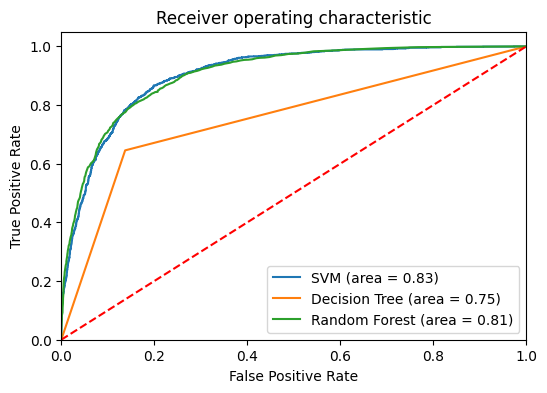

In [371]:
# roc curve for SVM
svm_roc_auc = roc_auc_score(y_test, y_pred)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svc_model.predict_proba(X_test_new)[:,1])

# roc curve for decision tree
decision_roc_auc = roc_auc_score(y_test, y_pred_decision)
decision_fpr, decision_tpr, decision_thresholds = roc_curve(y_test,
 decision_model.predict_proba(X_test_new)[:,1])

# roc curve for random forest
random_roc_auc = roc_auc_score(y_test, y_pred_random)
random_fpr, random_tpr, random_thresholds = roc_curve(y_test,
 random_forest_model.predict_proba(X_test_new)[:,1]
)

# Plot the graph
plt.figure(figsize=(6, 4))
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot(decision_fpr, decision_tpr, label='Decision Tree (area = %0.2f)' % decision_roc_auc)
plt.plot(random_fpr, random_tpr, label='Random Forest (area = %0.2f)' % random_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()